# released films

In [1]:
#https://www.kaggle.com/avnovikov/predicting-box-office
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

df = pd.read_csv('analysis_results/released_only.csv')
df.head()

,day,daily tweet count,day of week,title,box office,days since release,weekend,star,theaters
0,18.0,55.0,2.0,RampageMovie,5.098,97.0,0.0,1721.0,61.0
1,19.0,46.0,3.0,RampageMovie,4.059,98.0,0.0,1721.0,61.0
2,20.0,35.0,4.0,RampageMovie,35.295,99.0,1.0,1721.0,114.0
3,21.0,41.0,5.0,RampageMovie,49.155,100.0,1.0,1721.0,114.0
4,22.0,27.0,6.0,RampageMovie,40.598,101.0,1.0,1721.0,114.0


In [2]:
x = df[["daily tweet count","days since release","weekend","theaters"]]
y = df["box office"].values

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [4]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators=2000,max_depth=10).fit( x_train, y_train )
clf_score = clf.score(x_test, y_test)

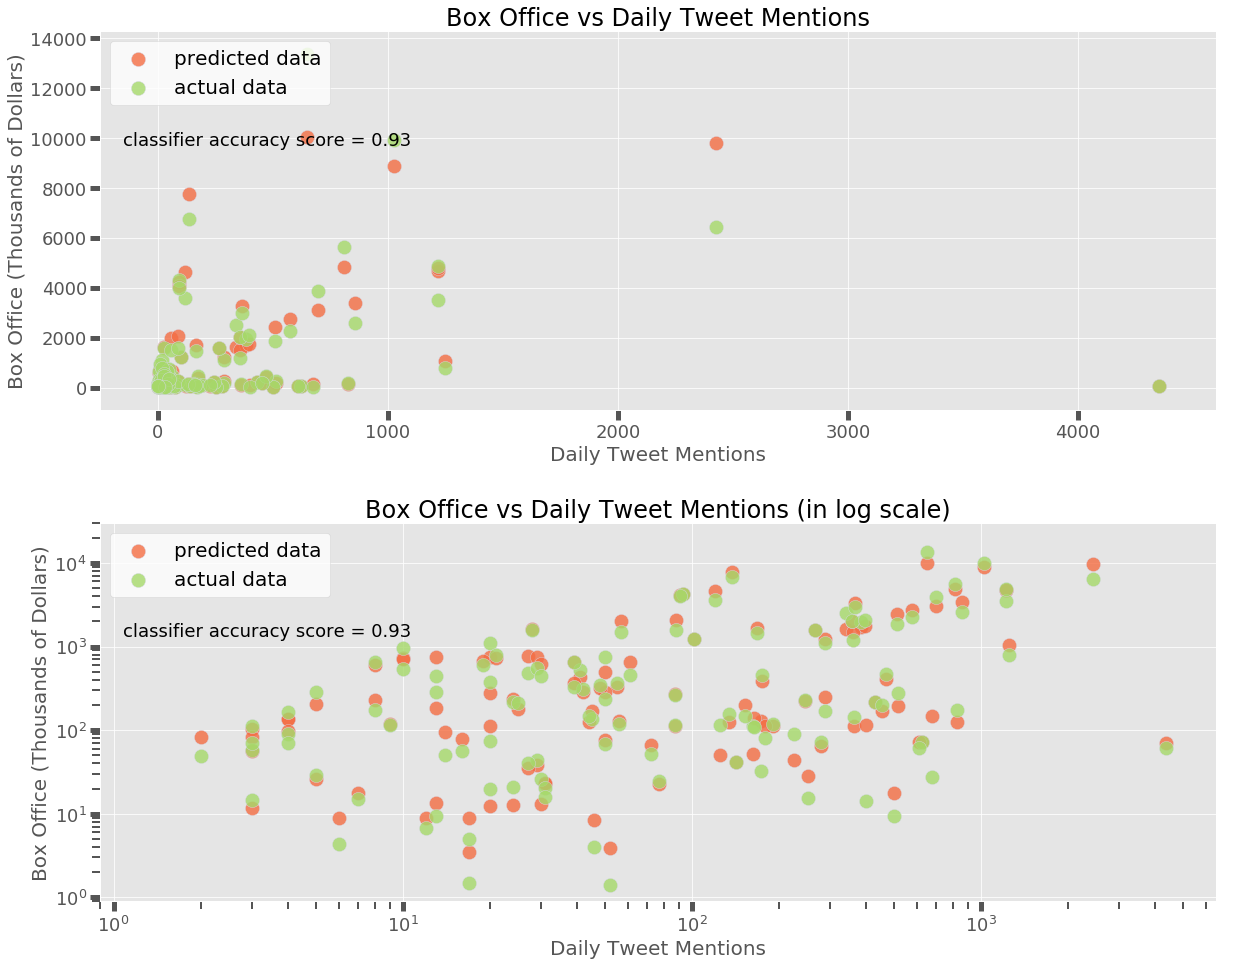

In [5]:
x_vals = x_test['daily tweet count']
y_predicted = clf.predict(x_test)

plt.style.use('ggplot')

#predicted = #f46d43
#actual = #a6d96a
#border = #ffffbf

fig = plt.figure(figsize = (20,16))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

# A function that takes in the subplot handle and formats the subplot
def figformat(ax, title, clf_score):
    ax.set_xlabel('Daily Tweet Mentions', fontsize = 20)
    ax.set_ylabel('Box Office (Thousands of Dollars)', fontsize = 20)
    ax.set_title(title, fontsize = 24)
    ax.tick_params(axis='both', length = 10, width = 5, labelsize = 18)
    ax.tick_params(axis='both', which = "minor", length = 8, width = 2)
    lgn_h = ax.legend(loc = "upper left", prop={'size': 20})
    frame = lgn_h.get_frame()
    frame.set_facecolor('white')
    ax.text(0.02,0.7,'classifier accuracy score = {:.2f}'.format(clf_score),transform=ax.transAxes, fontsize = 18)
    
def figformat2(ax):
    ax.set_xscale('log')
    ax.set_yscale('log') 
    ax.set_xlim(0.9, 6500)
    ax.set_ylim(0.9, 30000)

ax1.scatter(x_vals, y_predicted, c = "#f46d43", edgecolor = "#d8daeb", s = 200, alpha = 0.8, label = "predicted data")
ax1.scatter(x_vals, y_test, c = "#a6d96a", edgecolor = "#d8daeb", s = 200, alpha = 0.8, label = "actual data")
ax2.scatter(x_vals, y_predicted, c = "#f46d43", edgecolor = "#d8daeb", s = 200, alpha = 0.8, label = "predicted data")
ax2.scatter(x_vals, y_test, c = "#a6d96a", edgecolor = "#d8daeb", s = 200, alpha = 0.8, label = "actual data")

figformat(ax1, "Box Office vs Daily Tweet Mentions", clf_score)
figformat(ax2, "Box Office vs Daily Tweet Mentions (in log scale)", clf_score)
figformat2(ax2)

plt.subplots_adjust(hspace=0.3)
plt.savefig('analysis_results/random_forest_alldata.png')

# k-means

In [6]:
# http://fromdatawithlove.thegovans.us/2013/05/clustering-using-scikit-learn.html
### For the purposes of this example, we store feature data from our
### dataframe `df`, in the `f1` and `f2` arrays. We combine this into
### a feature matrix `X` before entering it into the algorithm.
x1 = df['daily tweet count'].values
x2 = df['days since release'].values
x3 = df['weekend'].values
x4 = df['theaters'].values
y = df['box office'].values
X = np.array(list(zip(x1, x2, x3, x4, y)))

In [7]:
from sklearn import cluster

def kmeans_plot(ax, x, y, c_x, c_y, i, xlabel):
    colorlist = ['#faa59e','#a2c2dd','#bce5b3','#d5bcdc']
    colorlist2 = ['#f41f0b','#4585ba','#58be41','#9557a8']
    ax.plot(x,y,'o', markersize=7, color = colorlist[i])
    lines = ax.plot(c_x,c_y,'*',color = colorlist2[i])

    plt.setp(lines,ms=20.0)
    plt.setp(lines,mew=3.0)
    
    ax.set_xlabel(xlabel, fontsize = 20)
    ax.set_ylabel('Box Office (Thousands of Dollars)', fontsize = 20)

def kmeans_and_clf(X, k):
    fig = plt.figure(figsize = (20,16))
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)
    
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    
    print(f'random forest clf accuracy score for k={k}')
    for i in range(k):

        group = pd.DataFrame({"day":[],"daily tweet count":[],"day of week":[],"title":[],"box office":[],"days since release":[],"weekend":[],"star":[],"theaters":[]})

        # select only data observations with cluster label == i
        ds = X[np.where(labels==i)]
        
        for row_index in range(len(ds)):
            datarow = df.loc[(df["daily tweet count"] == ds[row_index][0]) | (df["box office"] == ds[row_index][1]), :]
            group = pd.concat([group, datarow]).reset_index(drop = True) 

        x = group[["daily tweet count","days since release","weekend","theaters"]]
        y = group["box office"].values

        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

        clf = RandomForestRegressor(n_estimators=2000,max_depth=10).fit( x_train, y_train )
        clf_score = clf.score(x_test, y_test)

        print(clf_score)

        # plot the data observations
        kmeans_plot(ax1,ds[:,0],ds[:,4],centroids[i,0],centroids[i,4],i,"Daily Tweet Mentions")
        kmeans_plot(ax2,ds[:,1],ds[:,4],centroids[i,1],centroids[i,4],i,"Days Since Release")
        kmeans_plot(ax3,ds[:,2],ds[:,4],centroids[i,2],centroids[i,4],i,"Weekday or Weekend")
        kmeans_plot(ax4,ds[:,3],ds[:,4],centroids[i,3],centroids[i,4],i,"Number of Theaters Screening")

        
        


random forest clf accuracy score for k=2
0.9337368021158348
0.732638144773287


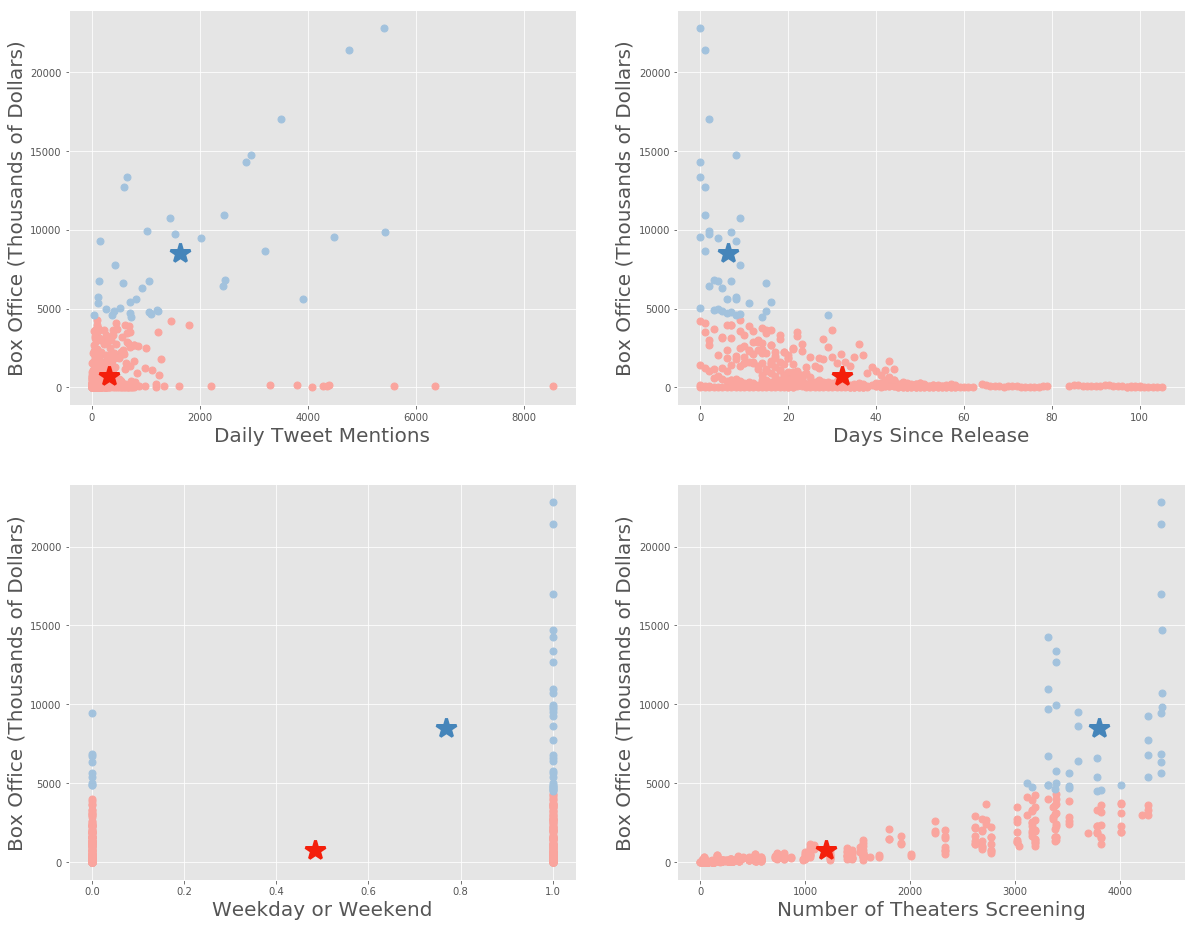

In [8]:
kmeans_and_clf(X, 2)
plt.savefig('analysis_results/k-clustering_2.png')

random forest clf accuracy score for k=3
0.948698774140683
-1.1652083730209086
0.7893223552589479


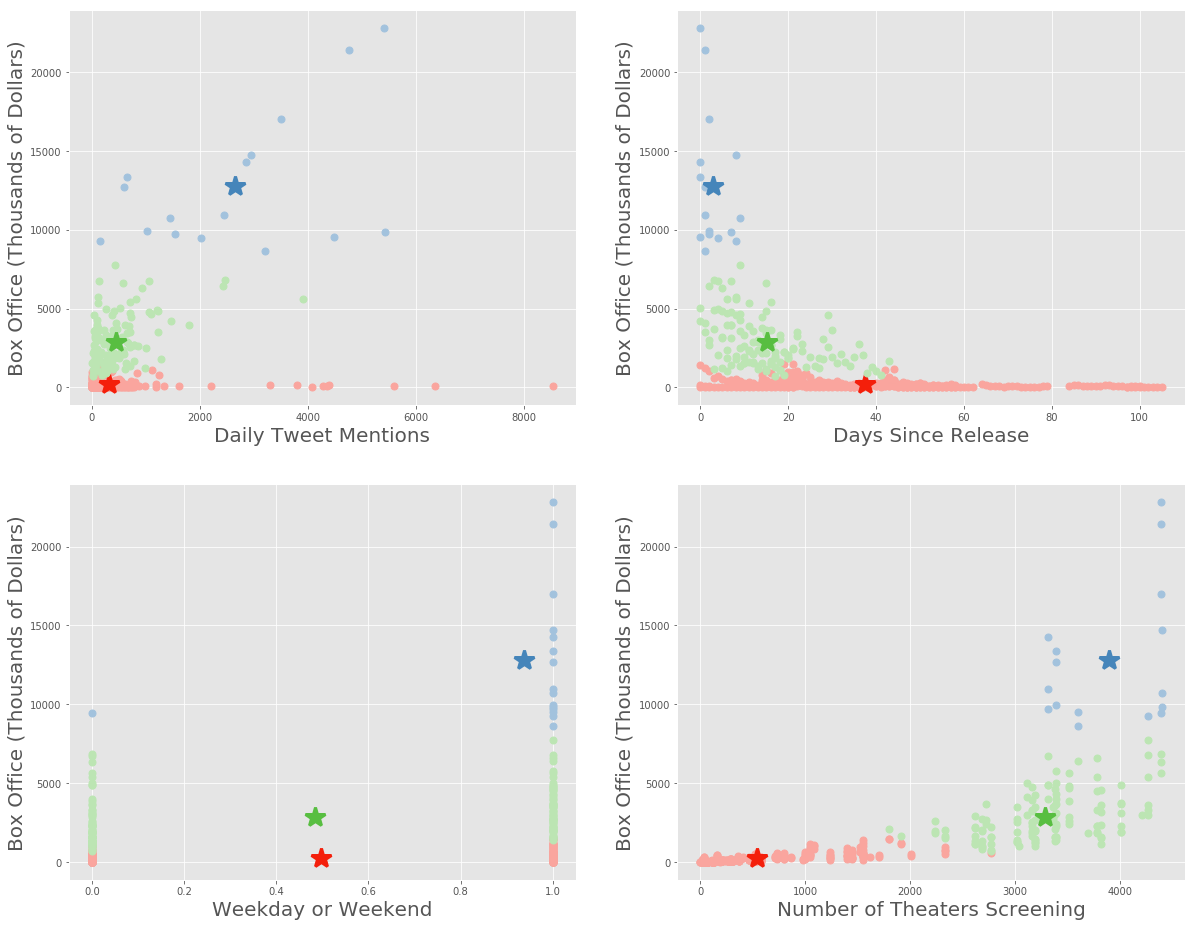

In [9]:
kmeans_and_clf(X, 3)
plt.savefig('analysis_results/k-clustering_3.png')

random forest clf accuracy score for k=4
0.9827104579832375
0.47263319261321
0.8282916046715001
0.40658329236240576


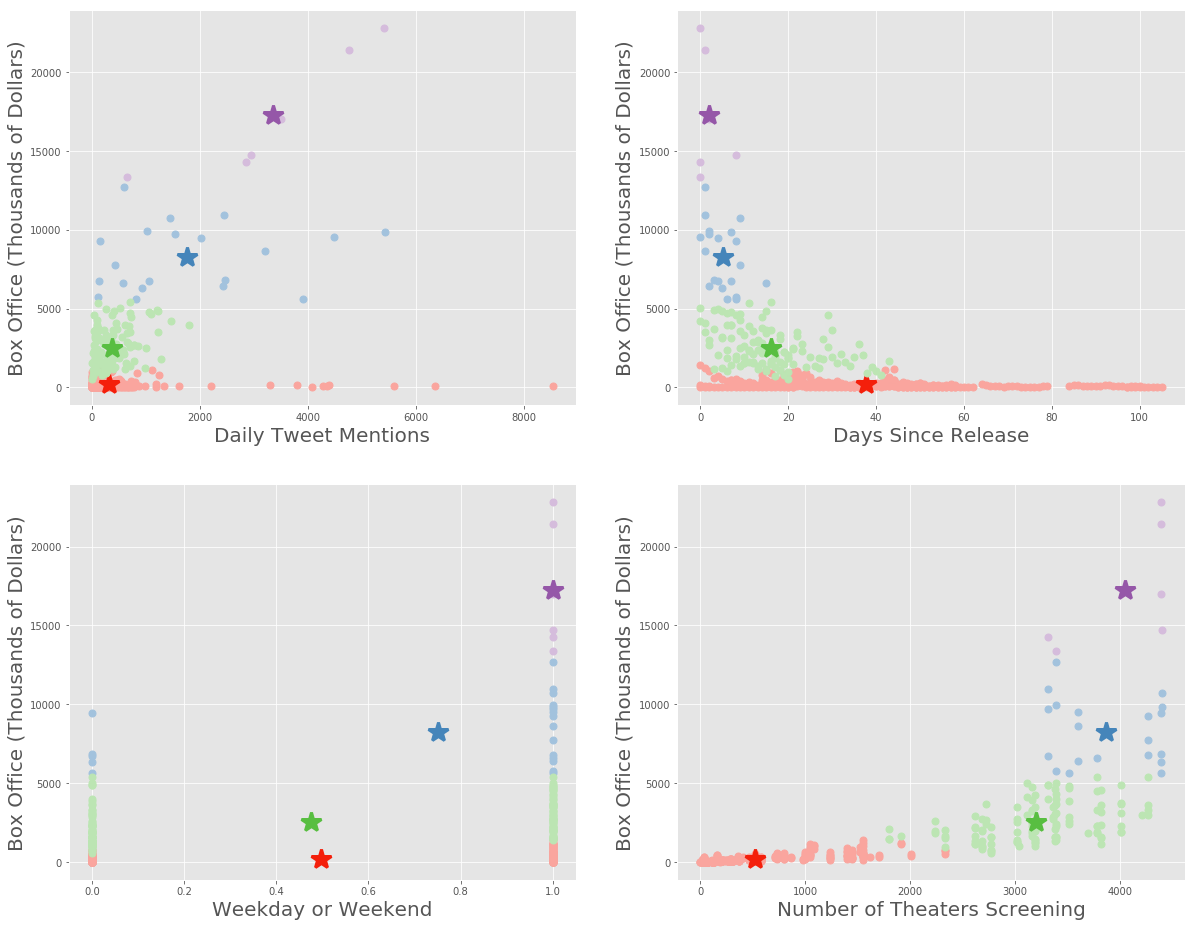

In [10]:
kmeans_and_clf(X, 4)
plt.savefig('analysis_results/k-clustering_4.png')